In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma

# Risky asset price under the risk-neutral probability & Volatility
_Scheme (6)_

In [2]:
M = 10**3
n = 10

l = 0.3
nu = 0.3
theta = 0.02
rho = -0.7
H = 0.1

V_0 = 0.02
S_0 = 1
Y_0 = np.log(S_0)

In [3]:
t_0 = 0
T = 1

In [4]:
def K_t(t):
    return t**(H-0.5)/gamma(H+0.5) #check

In [5]:
#t_delta = T/n
#t = [k*t_delta for k in range(n)]
#
#K_t_delta = np.zeros((n,n))
#for k in range(n):
#    for i in range(k):
#        K_t_delta[k,i] = K_t(t[k]-t[i])

In [6]:
def S_V_process(n):

    t_delta = T/n
    t = [k*t_delta for k in range(n)]

    K_t_delta = np.zeros((n,n))
    for k in range(n):
        for i in range(k):
            K_t_delta[k,i] = K_t(t[k]-t[i])

    G1 = np.random.randn(n)
    G2 = np.random.randn(n)

    W = np.zeros(n)
    W_orth = np.zeros(n)

    for i in range(n-1):
        W[i+1] = W[i] + np.sqrt(t[i+1] - t[i])*G1[i]
        W_orth[i+1] = W[i] + np.sqrt(t[i+1] - t[i])*G2[i]
    
    Y_n = np.zeros(n)
    V_n = np.zeros(n)

    S_n = np.zeros(n)

    S_n[0] = np.exp(Y_0)
    
    Y_sum = 0
    V_sum = 0
    
    for k in range(1,n):
        Y_sum = Y_sum + (-0.5*V_n[k-1] + (t[k] - t[k-1]) + rho*np.sqrt(np.maximum(V_n[k-1],0))*(W[k] - W[k-1]) //
                      + np.sqrt(1 - rho**2)*np.sqrt(np.maximum(V_n[k-1],0))*(W_orth[k] - W_orth[k-1]))
        Y_n[k] = Y_0 + Y_sum

        for i in range(k):
            V_sum = V_sum + K_t_delta[k,i]*(theta - l*np.maximum(V_n[i],0))*(t[i+1] - t[i]) + K_t_delta[k,i]*nu*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i])
        
        #V_sum = sum(K_t_delta[k,i]*(theta - l*np.maximum(V_n[i],0))*(t[i+1] - t[i]) //
        #              + K_t_delta[k,i]*nu*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i]) for i in range(k))
        
        V_n[k] = V_0 + V_sum

        S_n[k] = np.exp(Y_n[k])
   
    return S_n

In [7]:
K = 1

def european_call_options(x):
    return np.maximum(x-K,0)

def asian_options(x):
    A_T = T*np.mean(x)
    
    return np.maximum(A_t-K,0)

def lookback_options(x):
    M_T = np.max(x)
    
    return np.maximum(M_T-K,0)

In [8]:
def variance_swap_price(x):
    return x

def variance_call_price(x):
    return np.maximum(x-V_0,0)

In [9]:
function_8_scheme = european_call_options

In [10]:
S_n_M = np.zeros(M)

for m in range(M):
    S_n_m = S_V_process(n)
    S_n_M[m] = S_n_m[-1]


U_M = np.mean(function_8_scheme(S_n_M))
var_M = np.var(function_8_scheme(S_n_M))

error = 2*var_M/np.sqrt(M)
confidence_interval = [U_M - 2*error, U_M + 2*error]

print("E =", U_M)
print("Var =", var_M)
print(confidence_interval)
#print(S_n_M)

E = 1.2494014824710318
Var = 0.4849632418922803
[1.18805794543748, 1.3107450195045836]


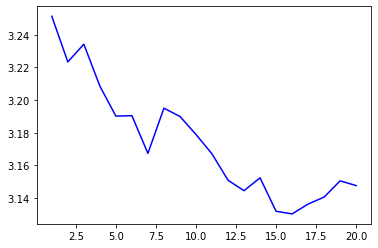

In [11]:
n = 20

U_M_n = np.zeros(n)

for i in range(n):
    S_n_M = np.zeros(M)

    for m in range(M):
        S_n_m = S_V_process(n)
        S_n_M[m] = S_n_m[-1]
        
    U_M = np.mean(function_8_scheme(S_n_M))
    U_M_n[i] = U_M

integers1toN = np.arange(1,n+1)
cum_sum_n = np.cumsum(U_M_n)/integers1toN

plt.plot(integers1toN, cum_sum_n, color="b")

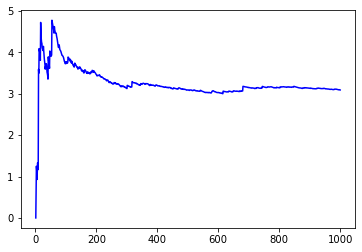

In [13]:
integers1toM = np.arange(1,M+1)
cum_sum = np.cumsum(function_8_scheme(S_n_M))/integers1toM

plt.plot(integers1toM, cum_sum, color="b")

# Integrated variance formulation (integrated-rough Heston model)
_Scheme (7)_

In [19]:
def S_X_process(n):
    
    t_delta = T/n
    t = [k*t_delta for k in range(n)]
    
    Y_n = np.zeros(n)
    X_n = np.zeros(n)
    X_n_max = np.zeros(n)
    
    S_n = np.zeros(n)

    M_n = np.zeros(n)
    M_n_orth = np.zeros(n)

    S_n[0] = np.exp(Y_0)
        
    Z = np.random.normal(0,1,n)
    Z_orth = np.random.normal(0,1,n)
    
    for k in range(n):
        X_n_max[k] = np.max(X_n)

        for i in range(1,k):
            M_n[k] = M_n[k] + np.sqrt(X_n_max[i] - X_n_max[i-1])*Z[i]
            M_n_orth[k] = M_n_orth[k] + np.sqrt(X_n_max[i] - X_n_max[i-1])*Z_orth[i]

        Y_n[k] = Y_0 - 0.5*X_n_max[k] + rho*M_n[k] + np.sqrt(1 - rho**2)*M_n_orth[k]

        X_sum = 0
        for i in range(k):
            X_sum = X_sum + K_t(t[k] - t[i])*(theta*t[i] - l*X_n_max[i] + nu*M_n[i])*(t[i+1]-t[i])

        X_n[k] = V_0*t[k] + X_sum
        
        S_n[k] = np.exp(Y_n[k])
    
    return (S_n, X_n)

In [20]:
function_9_scheme = variance_swap_price

In [21]:
X_n_M = np.zeros(M)

for m in range(M):
    X_n_m = S_X_process(n)[1]
    X_n_M[m] = X_n_m[-1]

U_M = np.mean(function_9_scheme(X_n_M))
var_M = np.var(function_9_scheme(X_n_M))

error = 2*var_M/np.sqrt(M)
confidence_interval = [U_M - 2*error, U_M + 2*error]

print("E =", U_M)
print("Var =", var_M)
print(confidence_interval)

E = 0.025791286935888426
Var = 0.0005735167025783063
[0.025718742173636552, 0.0258638316981403]


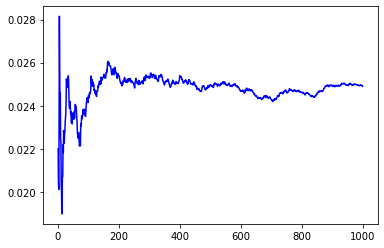

In [17]:
integers1toM = np.arange(1,M+1)
cum_sum = np.cumsum(function_9_scheme(X_n_M))/integers1toM

plt.plot(integers1toM, cum_sum, color="b")

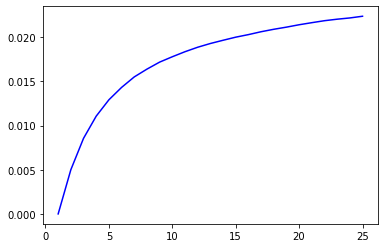

In [22]:
n = 25

U_M_n = np.zeros(n)

for i in range(n):
    X_n_M = np.zeros(M)

    for m in range(M):
        X_n_m = S_X_process(i+1)[1]
        X_n_M[m] = X_n_m[-1]
        
    U_M = np.mean(function_9_scheme(X_n_M))
    U_M_n[i] = U_M

integers1toN = np.arange(1,n+1)
cum_sum_n = np.cumsum(U_M_n)/integers1toN

plt.plot(integers1toN, cum_sum_n, color="b")